In [3]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
from plot_config import line_colors, lr_line_style, zs_line_style, ccs_line_style

num_hidden_layers = 40
layers_arr = np.arange(num_hidden_layers)

In [4]:
def load_data(data, train_dataset, test_dataset, reporter: str, path: str):
    data[(train_dataset, test_dataset, reporter)] = pd.read_csv(path)

In [5]:
d_array_all = [1,5,10,50,100,250,500,750,1000]

In [66]:
data = {}

#vinc
for d in d_array_all:
    dataset = f"arith{d}" 
    vinc_path = f'/home/waree/elk-reporters/test-huggyllama/llama-13b/sethapun/arithmetic_2as_1to{d}/vinc/eval.csv'
    load_data(data, dataset, dataset, 'vinc', vinc_path)

#ccs
for d in [1,5,10,100,500,1000]:
    dataset = f"arith{d}" 
    ccs_path = f'/home/waree/elk-reporters/test-huggyllama/llama-13b/sethapun/arithmetic_2as_1to{d}/ccs/eval.csv'
    load_data(data, dataset, dataset, 'ccs', ccs_path)


#transfer arith
origin_dataset_arith = "arith1000"
for d in [1,5,10,50,100,250,500,750]:
    dataset = f"arith{d}" 
    vinc_path_transfer = f'/home/waree/elk-reporters/test-huggyllama/llama-13b/sethapun/arithmetic_2as_1to1000/vinc/transfer_eval/sethapun/arithmetic_2as_1to{d}/eval.csv'
    load_data(data, origin_dataset_arith, dataset, 'vinc', vinc_path_transfer)

#transfer imdb
origin_dataset_imdb = "imdb_misspelled_0"
for d in [1,5,10,50,100,250,500,750,1000]:
    dataset = f"arith{d}" 
    vinc_path_transfer = f'/home/waree/elk-reporters/test-huggyllama/llama-13b/sethapun/imdb_misspelled_0/vinc/transfer_eval/sethapun/arithmetic_2as_1to{d}/eval.csv'
    ccs_path_transfer = f'/home/waree/elk-reporters/test-huggyllama/llama-13b/sethapun/imdb_misspelled_0/ccs/transfer_eval/sethapun/arithmetic_2as_1to{d}/eval.csv'
    load_data(data, origin_dataset_imdb, dataset, 'vinc', vinc_path_transfer)
    load_data(data, origin_dataset_imdb, dataset, 'ccs', ccs_path_transfer)


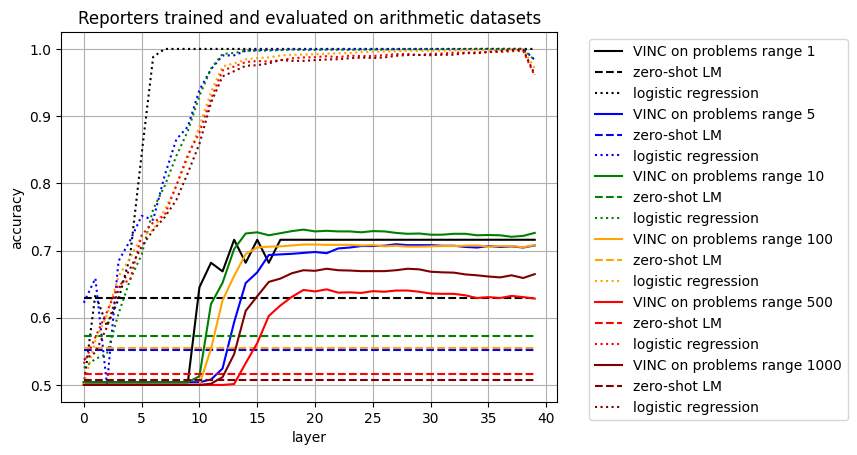

In [7]:
#big headline result

fig, ax = plt.subplots()
ax.set_title(fr"Reporters trained and evaluated on arithmetic datasets")
ax.set_xlabel("layer")
ax.set_ylabel("accuracy")
ax.grid(True)

for i,d in enumerate([1,5,10,100,500,1000]):
    dataset = f"arith{d}"

    experiment = data[(dataset, dataset, 'vinc')]
    layers = experiment['layer']

    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    ax.plot(layers, acc, label=f'VINC on problems range {d}', color=line_color)

    if 'lm_acc' in experiment.columns:
        lm_acc = experiment['lm_acc']
        # Set line color and style for zero-shot dataset
        ax.plot(layers, lm_acc, label='zero-shot LM',
                color=line_color, linestyle=zs_line_style)

    if 'lr_acc' in experiment.columns:
        lr_acc = experiment['lr_acc']
        # Set line color and style for logistic regression dataset
        ax.plot(layers, lr_acc, label='logistic regression',
                color=line_color, linestyle=lr_line_style)
               
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

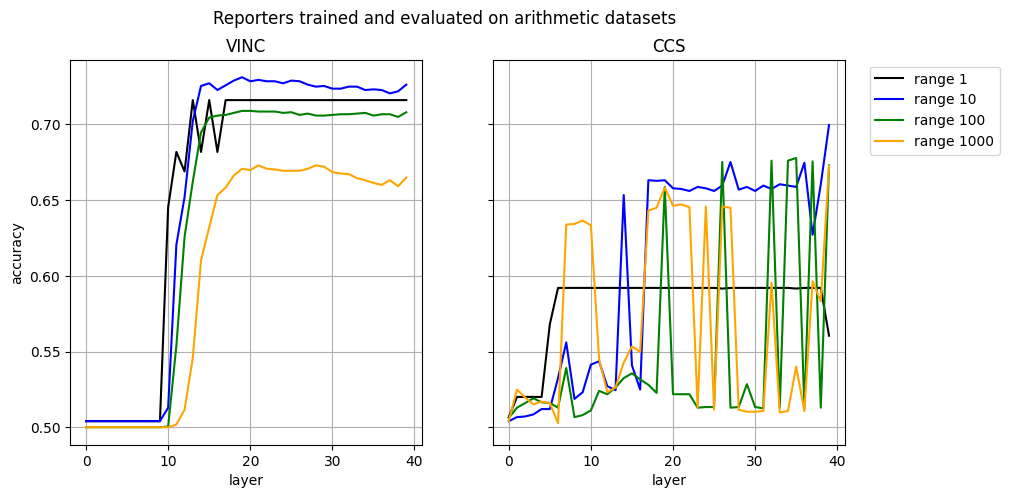

In [19]:
# sadly CCS does not perform as well and we won't be considering it further

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

# Set big title for the whole figure
fig.suptitle("Reporters trained and evaluated on arithmetic datasets")

ax = axs[0]
ax.set_title(fr"VINC")
ax.set_xlabel("layer")
ax.set_ylabel("accuracy")
ax.grid(True)

for i,d in enumerate([1,10,100,1000]):
    dataset = f"arith{d}"

    experiment = data[(dataset, dataset, 'vinc')]
    layers = experiment['layer']

    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    ax.plot(layers, acc, label=f'range {d}', color=line_color)

ax = axs[1]
ax.set_title(fr"CCS")
ax.set_xlabel("layer")
ax.grid(True)

for i,d in enumerate([1,10,100,1000]):
    dataset = f"arith{d}"

    experiment = data[(dataset, dataset, 'ccs')]
    layers = experiment['layer']

    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    ax.plot(layers, acc, label=f'range {d}', color=line_color)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

        


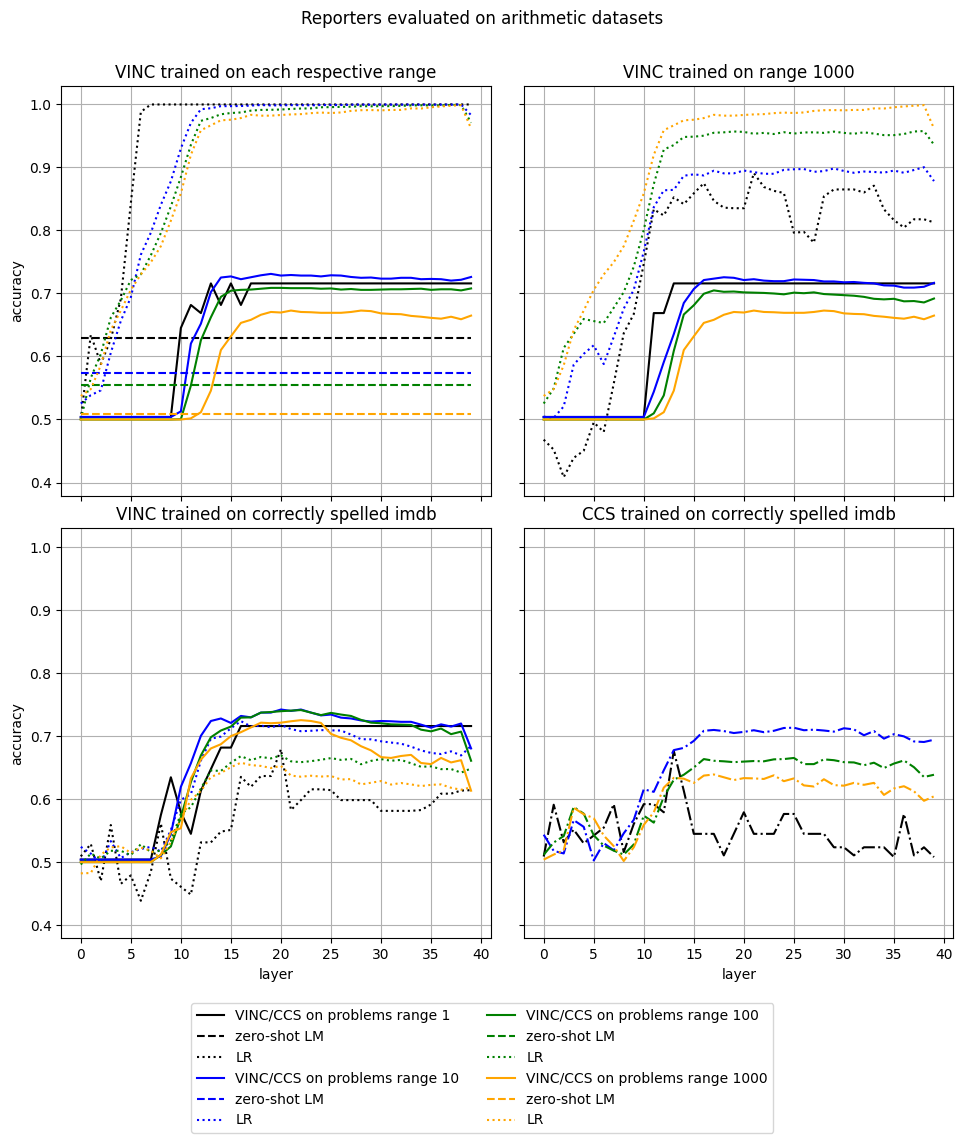

In [67]:
# trained and tested vs transfer

fig, axs = plt.subplots(2,2, figsize=(10, 10), sharey = True, sharex= True)

# Set big title for the whole figure
fig.suptitle("Reporters evaluated on arithmetic datasets")

ax = axs[0][0]
ax.set_title(fr"VINC trained on each respective range")
ax.set_ylabel("accuracy")
ax.grid(True)

for i,d in enumerate([1,10,100,1000]):
    dataset = f"arith{d}"

    experiment = data[(dataset, dataset, 'vinc')]
    layers = experiment['layer']

    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    ax.plot(layers, acc, label=f'VINC/CCS on problems range {d}', color=line_color)

    if 'lm_acc' in experiment.columns:
        lm_acc = experiment['lm_acc']
        # Set line color and style for zero-shot dataset
        ax.plot(layers, lm_acc, label='zero-shot LM',
                color=line_color, linestyle=zs_line_style)

    if 'lr_acc' in experiment.columns:
        lr_acc = experiment['lr_acc']
        # Set line color and style for logistic regression dataset
        ax.plot(layers, lr_acc, label='LR',
                color=line_color, linestyle=lr_line_style)
            
handles, labels = axs[0][0].get_legend_handles_labels()  # Assuming all subplots have the same legend
fig.legend(handles, labels, bbox_to_anchor=(0.5,-0.15), loc='lower center', ncol=len(labels)/6)

# Adjust the layout to make room for the legend
fig.subplots_adjust(bottom = 0.2)

fig.tight_layout(pad=2) 


ax = axs[0][1]
ax.set_title(fr"VINC trained on range 1000")
ax.grid(True)

for i,d in enumerate([1,10,100,1000]):
    dataset = f"arith{d}"

    dataset = f"arith{d}"

    experiment = data[(origin_dataset_arith, dataset, 'vinc')]
    layers = experiment['layer']

    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    ax.plot(layers, acc, label=f'VINC on problems range {d}', color=line_color)

    if 'lr_acc' in experiment.columns:
        lr_acc = experiment['lr_acc']
        # Set line color and style for logistic regression dataset
        ax.plot(layers, lr_acc, label='logistic regression',
                color=line_color, linestyle=lr_line_style)
        
ax = axs[1][0]
ax.set_title(fr"VINC trained on correctly spelled imdb")
ax.set_xlabel("layer")
ax.set_ylabel("accuracy")

ax.grid(True)

for i,d in enumerate([1,10,100,1000]):
    dataset = f"arith{d}"

    dataset = f"arith{d}"

    experiment = data[(origin_dataset_imdb, dataset, 'vinc')]
    layers = experiment['layer']

    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    ax.plot(layers, acc, label=f'VINC on problems range {d}', color=line_color)

    if 'lr_acc' in experiment.columns:
        lr_acc = experiment['lr_acc']
        # Set line color and style for logistic regression dataset
        ax.plot(layers, lr_acc, label='logistic regression',
                color=line_color, linestyle=lr_line_style)

ax = axs[1][1]
ax.set_title(fr"CCS trained on correctly spelled imdb")
ax.set_xlabel("layer")
ax.grid(True)

for i,d in enumerate([1,10,100,1000]):
    
    dataset = f"arith{d}"

    experiment = data[(origin_dataset_imdb, dataset, 'ccs')]
    layers = experiment['layer']
    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    ax.plot(layers, acc, label=f'CCS', color=line_color, linestyle=ccs_line_style)
            
plt.show()

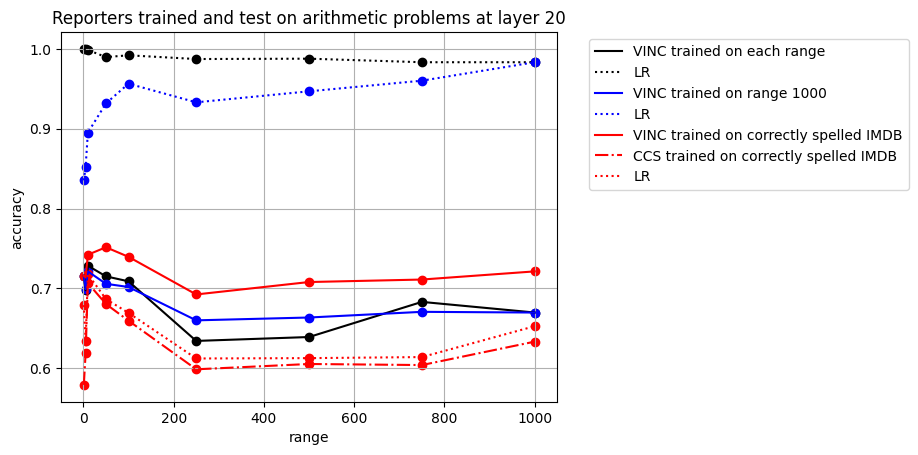

In [68]:
# transfer at layer 20

fig, ax = plt.subplots()
ax.set_title(fr"Reporters trained and test on arithmetic problems at layer 20")
ax.set_xlabel("range")
ax.set_ylabel("accuracy")
ax.grid(True)

layer = 20
acc_vinc = []
acc_vinc_transfer = []
acc_lr = []
acc_lr_transfer = []

acc_vinc_imdb = []
acc_lr_imdb = []
acc_ccs_imdb = []


d_arr = [1,5,10,50,100,250,500,750,1000]

for d in d_arr:

    dataset = f"arith{d}"

    #origin
    experiment = data[(dataset, dataset, 'vinc')]
    acc_vinc.append(experiment.loc[layer, 'acc'])
    acc_lr.append(experiment.loc[layer, 'lr_acc'])

    #transfer_arith
    experiment = data[(origin_dataset_arith, dataset, 'vinc')]
    acc_vinc_transfer.append(experiment.loc[layer, 'acc'])
    acc_lr_transfer.append(experiment.loc[layer, 'lr_acc'])

    #transfer_imdb
    experiment = data[(origin_dataset_imdb, dataset, 'vinc')]
    acc_vinc_imdb.append(experiment.loc[layer, 'acc'])
    acc_lr_imdb.append(experiment.loc[layer, 'lr_acc'])
    experiment = data[(origin_dataset_imdb, dataset, 'ccs')]
    acc_ccs_imdb.append(experiment.loc[layer, 'acc'])


ax.plot(d_arr, acc_vinc, label=f'VINC trained on each range', color = 'k')
ax.scatter(d_arr, acc_vinc, color = 'k')
ax.plot(d_arr, acc_lr, label=f'LR', color = 'k', linestyle=lr_line_style)
ax.scatter(d_arr, acc_lr, color = 'k')

ax.plot(d_arr, acc_vinc_transfer, label=f'VINC trained on range 1000', color = 'b')
ax.scatter(d_arr, acc_vinc_transfer, color = 'b')
ax.plot(d_arr, acc_lr_transfer, label=f'LR', color = 'b', linestyle=lr_line_style)
ax.scatter(d_arr, acc_lr_transfer, color = 'b')

ax.plot(d_arr, acc_vinc_imdb, label=f'VINC trained on correctly spelled IMDB', color = 'r')
ax.scatter(d_arr, acc_vinc_imdb, color = 'r')
ax.plot(d_arr, acc_ccs_imdb, label=f'CCS trained on correctly spelled IMDB', color = 'r', linestyle=ccs_line_style)
ax.scatter(d_arr, acc_ccs_imdb, color = 'r')
ax.plot(d_arr, acc_lr_imdb, label=f'LR', color = 'r', linestyle=lr_line_style)
ax.scatter(d_arr, acc_lr_imdb, color = 'r')
            
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

lr1000 not being better than local makes sense since LR can overfit dataset
VINC generalizes!!! 

## Ungrouped

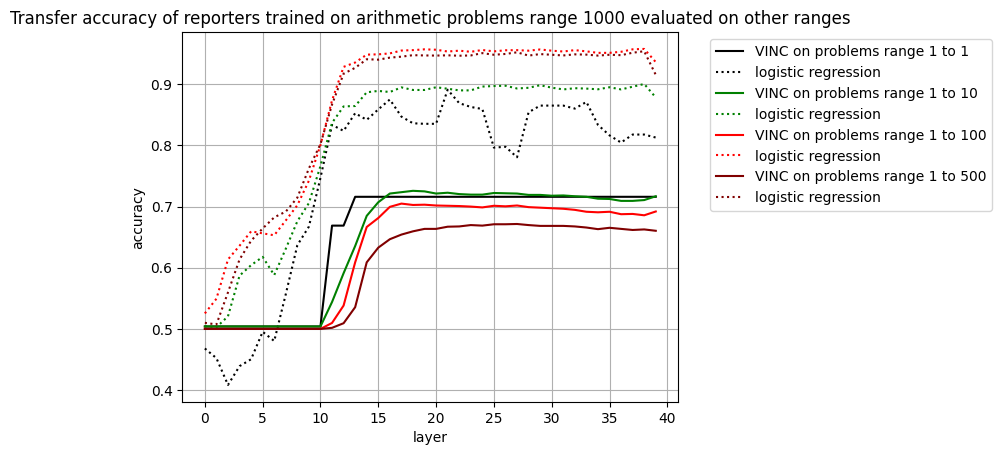

In [33]:
fig, ax = plt.subplots()
ax.set_title(fr"Transfer accuracy of reporters trained on arithmetic problems range 1000 evaluated on other ranges")
ax.set_xlabel("layer")
ax.set_ylabel("accuracy")
ax.grid(True)

for i,d in enumerate(d_array):

    if d not in d_array_less:
        continue

    dataset = f"arith{d}"

    experiment = data[(origin_dataset, dataset, 'vinc')]
    layers = experiment['layer']

    acc = experiment['acc']
    # Set line color for current dataset
    line_color = line_colors[i]
    ax.plot(layers, acc, label=f'VINC on problems range 1 to {d}', color=line_color)

    if 'lm_acc' in experiment.columns:
        lm_acc = experiment['lm_acc']
        # Set line color and style for zero-shot dataset
        ax.plot(layers, lm_acc, label='zero-shot LM',
                color=line_color, linestyle=zs_line_style)

    if 'lr_acc' in experiment.columns:
        lr_acc = experiment['lr_acc']
        # Set line color and style for logistic regression dataset
        ax.plot(layers, lr_acc, label='logistic regression',
                color=line_color, linestyle=lr_line_style)
            
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()